##          The project goal is to design a system which tells whether the person will be saved from sinking or not through knowing what factors were most likely lead to survival like status, age, gender and more.
### This will be done by data visualization, data cleaning, and using logistic regression algorithm as the machine learning technique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

Displaying Data:

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Showing the places of empty data:

<Axes: >

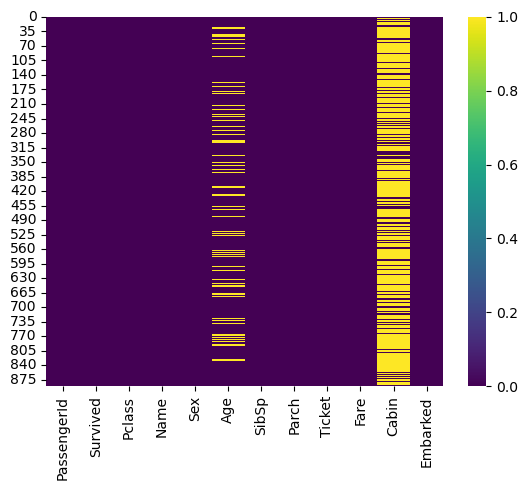

In [6]:
sns.heatmap(df.isnull(),cmap='viridis')

# Data visualization

Showing number of people survived:

<Axes: xlabel='Survived', ylabel='count'>

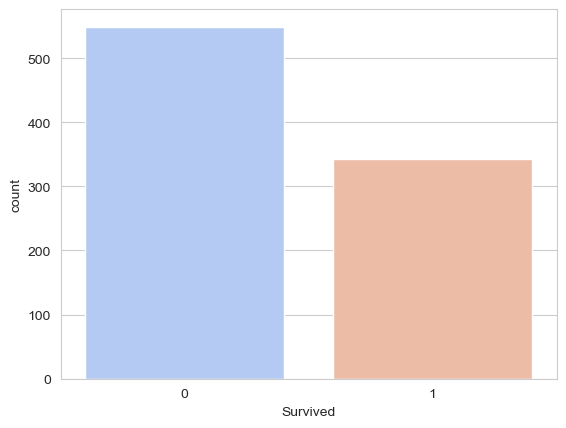

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='coolwarm')

Displaying how each feature affecting the number of survived people:

<Axes: xlabel='Survived', ylabel='count'>

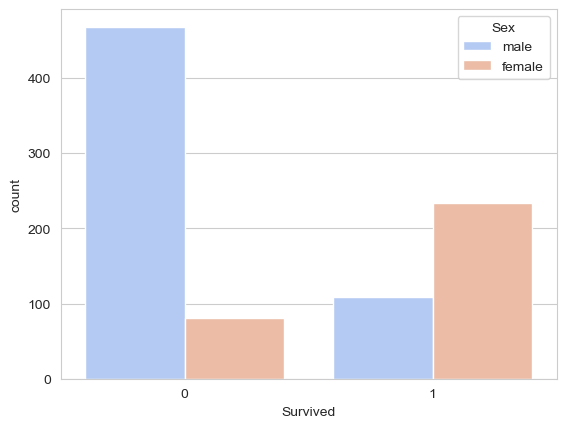

In [8]:
sns.countplot(x='Survived',data=df,palette='coolwarm',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

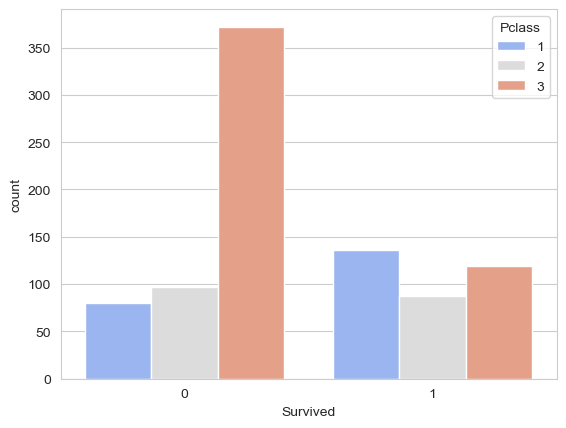

In [9]:
sns.countplot(x='Survived',data=df,palette='coolwarm',hue = 'Pclass')

<Axes: xlabel='Survived', ylabel='count'>

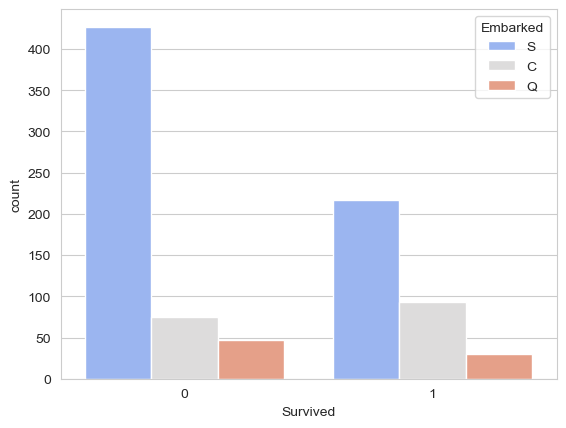

In [10]:
sns.countplot(x='Survived',data=df,palette='coolwarm', hue = 'Embarked')

<Axes: xlabel='Survived', ylabel='Age'>

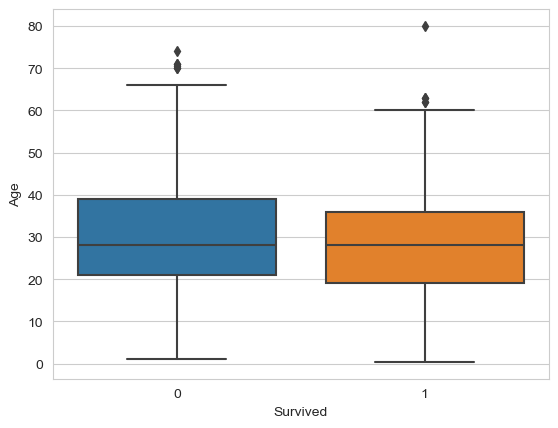

In [11]:
sns.boxplot(data = df ,x = 'Survived', y = 'Age')

## Conclusion:
1- Number of females survived are higher than males.                                                                            
2- Most of the died people are from pclass 3.                                                                                   
3- There is no relation between the survival of people and the embarked data.                                                   
4- The average age of survived people are slightly higher than who did not survive. 



# Data Cleaning

Finding relation between age and pclass:

<Axes: xlabel='Pclass', ylabel='Age'>

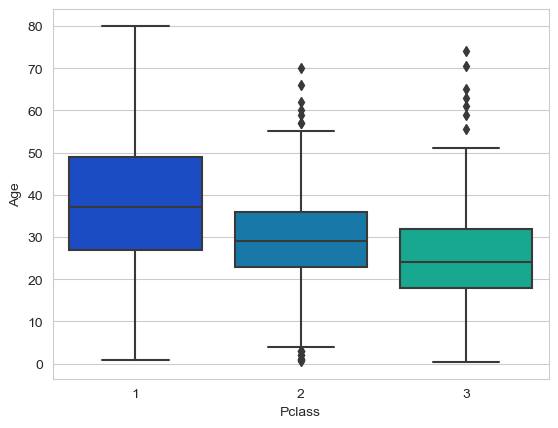

In [12]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [13]:
df.groupby('Pclass').mean()['Age']

C:\Users\Mido\AppData\Local\Temp\ipykernel_11028\328810730.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Pclass').mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [174]:
def compute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

Filling empty spaces in Age column:

In [15]:
df['Age'] = df[['Age','Pclass']].apply(compute_age,axis=1)

<Axes: >

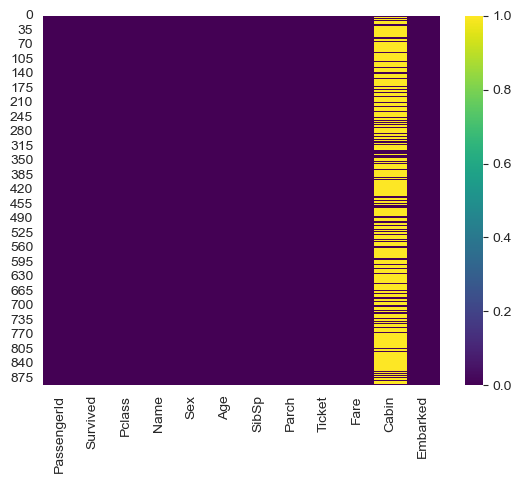

In [16]:
sns.heatmap(df.isnull(),cmap='viridis')

Changing cabin column into either cabin number available or not:

In [17]:
def cabin_(c):
    Cabin = c
    if pd.isnull(Cabin):
        return 0
    else:
        return 1

In [18]:
df['Cabin'] = df['Cabin'].apply(cabin_)

<Axes: >

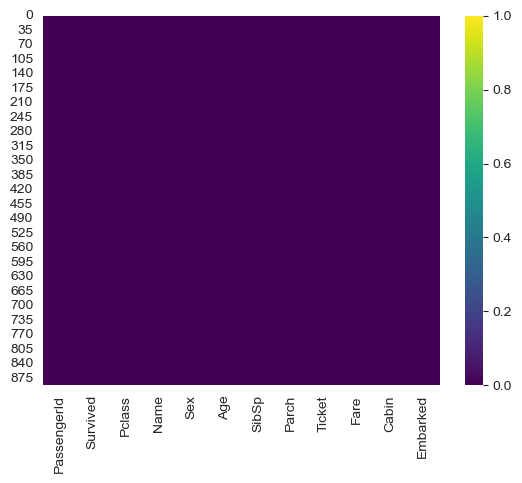

In [19]:
sns.heatmap(df.isnull(),cmap='viridis')

Dropping any other unfilled rows:

In [20]:
df.dropna(inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   Cabin        889 non-null    int64  
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
 10  2            889 non-null    uint8  
 11  3            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 59.9 KB


Changing any categorial data into dummies form:

In [22]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
PClass = pd.get_dummies(df['Pclass'],drop_first=True)

In [23]:
df.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [24]:
df = pd.concat([df,sex,embark,PClass],axis=1)

In [110]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   Cabin        889 non-null    int64  
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
 10  2            889 non-null    uint8  
 11  3            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 59.9 KB


# Machine Learning using Logistic Regression

Splitting and training data:

In [115]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X.columns = X.columns.astype(str)
y = y.astype(str)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [123]:
from sklearn import metrics

In [125]:
from sklearn.linear_model import LogisticRegression

In [175]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Predicting the test size data:

In [176]:
predictions = logmodel.predict(X_test)

Evaluation:

In [172]:
print(metrics.classification_report(y_test,predictions))
print('confusion matrix:',metrics.confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.71      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

confusion matrix: [[115  19]
 [ 26  63]]
